In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython

import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers,math

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib as mpl


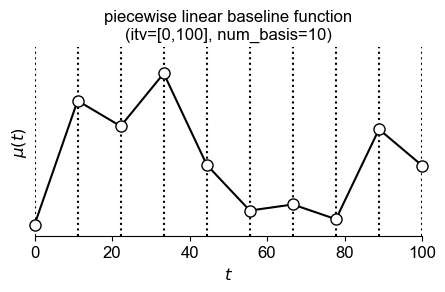

In [4]:
itv = [0,100]
num_basis = 10
y = np.random.rand(num_basis)
plinear = lambda x: np.interp(x,np.linspace(itv[0],itv[1],num_basis),y)
x = np.arange(101)

plt.figure(figsize=(5,2.5), dpi=100)
mpl.rc('font', size=12, family='Arial')
mpl.rc('axes',titlesize=12)
mpl.rc('pdf',fonttype=42)



for i in range(num_basis):
    plt.plot(np.repeat(np.linspace(itv[0],itv[1],num_basis)[i],2),[0,1],"k:")
plt.plot(x,plinear(x),'k-')
plt.plot(np.linspace(itv[0],itv[1],num_basis),y,"ko",mfc=[1,1,1],markersize=8,clip_on=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(itv)
plt.ylim([0,1])
plt.yticks([])
plt.xlabel(r"$t$")
plt.ylabel(r"$\mu(t)$")
plt.title("piecewise linear baseline function\n(itv=[0,100], num_basis=10)")

pass

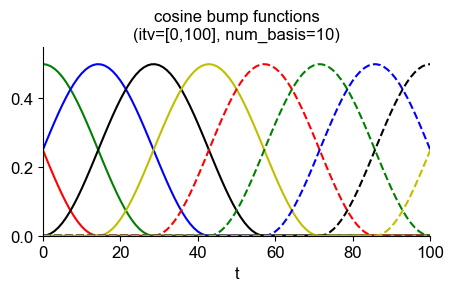

In [2]:
from Hawkes.BasisFunction import loglinear_COS_intensity
itv = [0,100]
num_basis = 10
loglinear = loglinear_COS_intensity(itv,num_basis)
x = np.arange(0,101)
loglinear.set_x(x)

plt.figure(figsize=(5,2.5), dpi=100)
mpl.rc('font', size=12, family='Arial')
mpl.rc('axes',titlesize=12)
mpl.rc('pdf',fonttype=42)

lt = ["r-","g-","b-","k-","y-","r--","g--","b--","k--","y--"]
for i in range(10):
    plt.plot(x,loglinear.M_BF[:,i],lt[i])
    
plt.xlabel("t")
plt.xlim([0,100])
plt.ylim([0,0.55])
plt.title("cosine bump functions\n(itv=[0,100], num_basis=10)")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)